# [1] Gradient Descent on Boston House Prices dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, neighbors
from sklearn.datasets import load_boston

from sklearn.linear_model import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tqdm import *
import warnings
warnings.filterwarnings("ignore")
import time
%matplotlib inline

In [2]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [3]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#Adding target variable to the dataframe to find out correlation matrix.
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#To check if there are any missing values in any of the columns.
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Correlation Matrix**

In [7]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

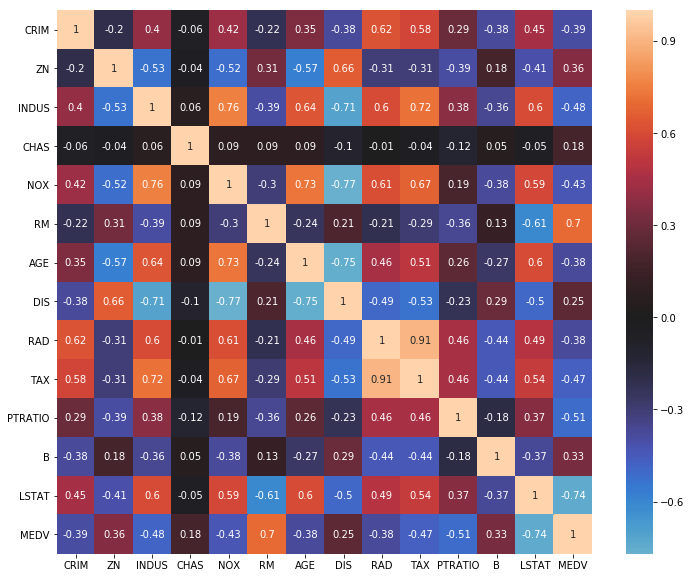

In [8]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"size": 10}, center=0)

**Conclusions**
1. Choosing 'LSTAT' as 'LSTAT' seems to be the most collinear feature to target feature 'MEDV'.

# [1.1] Gradient Descent for single feature.

In [9]:
# y = mx + b
m = 0
b = 0
y = lambda x : m*x + b # y is represented in terms of x by using lambda function. 

In [10]:
def plot_line(y, data_points):
    x_values = [i for i in range(int(min(data_points))-1, int(max(data_points))+2)]
    y_values = [y(x) for x in x_values]
    plt.plot(x_values, y_values, 'r')

In [11]:
x_points = boston.values[:,12]

In [12]:
y_points = boston_dataset.target

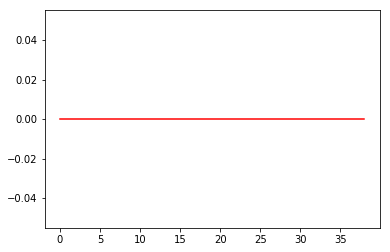

In [13]:
plot_line(y, x_points)

$$m = m - \alpha \frac{1}{k} \sum_{i=1}^{k} (f(x^{i}) - y^{i})$$
$$b = b - \alpha \frac{1}{k} \sum_{i=1}^{k} ((f(x^{i}) - y^{i}) * x^{i})$$

In [14]:
learn = .001 # .001, .01, .1, 1 ...
#decay = learn/10000
#for i in range(10000):
    #lr *= ((1./1. + decay * i))
    

In [15]:
def summation(y, x_points, y_points):
    total1 = 0
    total2 = 0
    
    for i in range(1, len(x_points)):
        total1 += y(x_points[i]) - y_points[i]
        total2 += (y(x_points[i]) - y_points[i]) * x_points[i]
        
    return total1 / len(x_points), total2 / len(x_points)

In [16]:
def gradient_descent(iter):
    global m
    global b
    for i in range(iter):
        s1, s2 = summation(y, x_points, y_points)
        #learn /= 2
        m = m - learn * s2
        b = b - learn * s1

**For 5000 iterations**

In [17]:
gradient_descent(5000)

In [18]:
m

-0.3260539409043792

In [19]:
b

24.15921113454667

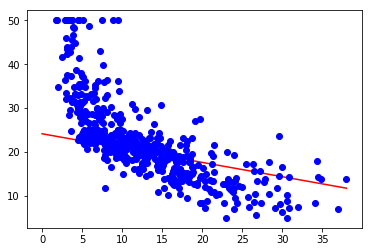

In [20]:
plot_line(y, x_points)
plt.plot(x_points, y_points, 'bo')

**For 10000 iterations**

In [21]:
gradient_descent(5000)

In [22]:
m

-0.7627624580429124

In [23]:
b

31.43717670152527

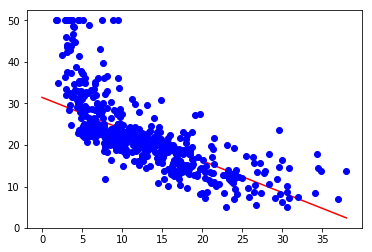

In [24]:
plot_line(y, x_points)
plt.plot(x_points, y_points, 'bo')

**For 15000 iterations**

In [25]:
gradient_descent(5000)

In [26]:
m

-0.8946877980948308

In [27]:
b

33.63577838807133

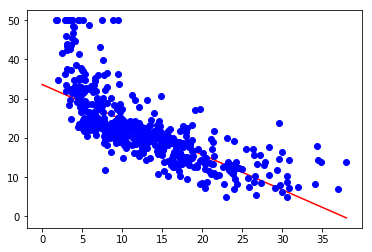

In [28]:
plot_line(y, x_points)
plt.plot(x_points, y_points, 'bo')

In [29]:
y(10)

24.688900407123022

**Conclusions**
1. With increase in number of iterations we observe a better convergence.

# [1.2] Gradient Descent for multiple features.

In [30]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
rows, columns = boston.shape
print(rows, columns)

506 13


In [32]:
m = rows
X = StandardScaler().fit_transform(boston.values)
x0 = np.ones(m) #Considering the intercept term for GD.
X = np.array(np.c_[x0, X]) # Horizontally stacking np.ones(m) to the boston dataset.
X.T
B = np.zeros(columns + 1) # Initial gradient is set to zeroes.
Y = np.array(boston_dataset.target)
alpha = 0.000001 # Constant Learning rate.

In [33]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [34]:
cost_function(X, Y, B)

296.0734584980237

In [35]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in trange(iterations):
        # Hypothesis Values or y-hat
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        #alpha /= 2
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

**For 1 million iterations**

In [36]:
time_start = time.time()

newB, cost_history = gradient_descent(X, Y, B, alpha, 1000000)

print ('gradient_descent done! Time elapsed: {} seconds'.format(time.time()-time_start))

100%|██████████| 1000000/1000000 [00:30<00:00, 32889.58it/s]


gradient_descent done! Time elapsed: 30.412718772888184 seconds


In [37]:
cost_history[-1]

47.85572873850154

In [38]:
#Lets find out coef of all the features.
newB

array([14.24345427, -0.58849756,  0.45402644, -0.56172544,  0.78329469,
       -0.43863223,  2.56868699, -0.25197259, -0.67004199, -0.03080239,
       -0.50023324, -1.43683668,  0.66343357, -2.27013721])

In [39]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [40]:
Y_pred = X.dot(newB)

In [41]:
print('Root mean square error for 1 million iterations is  {}'.format(rmse(Y, Y_pred)))

Root mean square error for 1 million iterations is  9.783223266235064


In [42]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [43]:
print('R2 score for 1 million iterations is  {}'.format(r2_score(Y, Y_pred)))

R2 score for 1 million iterations is  -0.1337593069069074


**For 5 million iterations**

In [44]:
#Reinitializing gradient to zeroes.
B = np.zeros(columns + 1)

In [45]:
time_start = time.time()

newB, cost_history = gradient_descent(X, Y, B, alpha, 5000000)

print ('gradient_descent done! Time elapsed: {} seconds'.format(time.time()-time_start))

100%|██████████| 5000000/5000000 [02:32<00:00, 32685.22it/s]


gradient_descent done! Time elapsed: 153.01820945739746 seconds


In [46]:
cost_history[-1]

11.347846106218043

In [47]:
#Lets find out coef of all the features.
newB

array([22.38098185, -0.66956929,  0.59260312, -0.38018155,  0.78100864,
       -1.04769603,  3.14033844, -0.15478927, -2.16209089,  0.92708229,
       -0.53723347, -1.8480164 ,  0.89913332, -3.4554321 ])

In [48]:
Y_pred = X.dot(newB) # making predictions 

In [49]:
print('Root mean square error for 5 million iterations is  {}'.format(rmse(Y, Y_pred)))
print('R2 score for 5 million iterations is  {}'.format(r2_score(Y, Y_pred)))

Root mean square error for 5 million iterations is  4.763999602480681
R2 score for 5 million iterations is  0.7311559874769786


**For 7.5 million iterations**

In [50]:
#Reinitializing gradient to zeroes.
B = np.zeros(columns + 1)

In [51]:
time_start = time.time()

newB, cost_history = gradient_descent(X, Y, B, alpha, 7500000)

print ('gradient_descent done! Time elapsed: {} seconds'.format(time.time()-time_start))

100%|██████████| 7500000/7500000 [03:55<00:00, 31876.87it/s]


gradient_descent done! Time elapsed: 235.39999175071716 seconds


In [52]:
#Lets find out coef of all the features.
newB

array([22.52034383, -0.72797299,  0.71740788, -0.32428025,  0.75485636,
       -1.36241004,  2.98777667, -0.13216882, -2.52102556,  1.2231147 ,
       -0.71212049, -1.91132161,  0.8921203 , -3.58491852])

In [53]:
Y_pred = X.dot(newB)

In [54]:
print('Root mean square error for 7.5 million iterations is  {}'.format(rmse(Y, Y_pred)))
print('R2 score for 7.5 million iterations is  {}'.format(r2_score(Y, Y_pred)))

Root mean square error for 7.5 million iterations is  4.726234939046107
R2 score for 7.5 million iterations is  0.7354013961203614


**For 15 million iterations**

In [55]:
#Reinitializing gradient to zeroes.
B = np.zeros(columns + 1)

In [56]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 15000000)

100%|██████████| 15000000/15000000 [08:22<00:00, 29827.45it/s]


In [57]:
cost_history[-1]

11.008657110828675

In [58]:
#Lets find out coef of all the features.
newB

array([22.53279943, -0.83233868,  0.92540332, -0.17356146,  0.72719665,
       -1.8258138 ,  2.78162393, -0.05535184, -2.96670908,  1.80446033,
       -1.17981141, -2.00105611,  0.86265395, -3.69955781])

In [59]:
newB[0] #Intercept term.

22.532799431324527

In [60]:
Y_pred = X.dot(newB)

In [61]:
print('Root mean square error for 15 million iterations is  {}'.format(rmse(Y, Y_pred)))
print('R2 score for 15 million iterations is  {}'.format(r2_score(Y, Y_pred)))

Root mean square error for 15 million iterations is  4.692261099049938
R2 score for 15 million iterations is  0.7391917794387823


**Conclusions**
1. With increase in number of iterations we observe a lower RMSE also a better R2 score.

**RMSE vs Iterations curve**

In [62]:
RMSE_batch = np.take(cost_history, [range(0, 10000000, 10000)]) #Taking only 1000 costs from cost_history.

In [63]:
RMSE_batch.shape

(1, 1000)

In [64]:
RMSE_batch = RMSE_batch[0]

In [65]:
RMSE_batch = RMSE_batch.round(2) # Rounding costs to 2 significant digits.

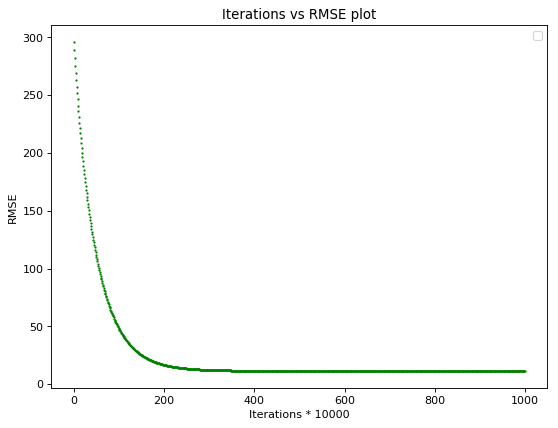

In [66]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Iterations vs RMSE plot')
plt.xlabel('Iterations * 10000')
plt.ylabel('RMSE')
plt.legend('Root Square Mean error', loc = 'upper right')
plt.plot(np.arange(1000), RMSE_batch, 'go', markersize = 1)

**Conclusions**
1. The RMSE initailly decreseses rapidly but decreseses only marginally later on for very high iteration numbers.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [68]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
X = boston.values
X = StandardScaler().fit_transform(X)
y = boston_dataset.target

**Implentation of SGDRegressor using sklearn library.**

In [70]:
#To find out w for SGDRegressor.
from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

time_start = time.time()

clf = SGDRegressor(max_iter=1000000)
clf.fit(X, y)
y_pred = clf.predict(X)
print ('SGDRegressor done! Time elapsed: {} seconds'.format(time.time()-time_start))

# Calculating RMSE and R2 Score
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

r2_score = r2_score(y, y_pred)

print(np.sqrt(mse))
print(r2_score)

w = clf.coef_
intercept = clf.intercept_

SGDRegressor done! Time elapsed: 55.54964852333069 seconds
4.679507443223801
0.7406076161940629


In [71]:
w

array([-0.92043779,  1.08078593,  0.14145921,  0.68282369, -2.05971492,
        2.67009849,  0.02102754, -3.10308287,  2.65488173, -2.07294107,
       -2.06241226,  0.85696304, -3.7486925 ])

In [72]:
intercept

array([22.53256501])

In [73]:
clf.n_iter_

1000000

# Conclusions

1. Gradient Descent implentation from scrath for 15 million iterations got us higher RMSE and almost the same R2 score compared to SKlearn implementation of SGDRegressor.
2. Also, SKlearn implentation is much faster.

| A.| Model        | Hyperparameter| RMSE           | R2 Score     |
|---|--------------|---------------|----------------|--------------|
| 1.| SGD(scratch) | Iter = 1.5e+7 | 4.692          | 0.739        |
| 2.| SGD(SKlearn) | Iter = 10e+7  | 4.679          | 0.740        |